In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split

data = pd.read_csv("/content/DailyDelhiClimateTrain.csv")

In [ ]:
# Q1: Explore the dataset
print(data.info())
print(data.describe())

# Check for missing values
missing_values = data.isnull().sum()
print("\nMissing values:\n", missing_values)

# Handle missing values (imputation with mean for simplicity)
numeric_data = data.select_dtypes(include=np.number)
data[numeric_data.columns] = numeric_data.fillna(numeric_data.mean())

# Key statistics
statistics = data.describe()
print("\nKey statistics:\n", statistics)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1462 non-null   object 
 1   meantemp      1462 non-null   float64
 2   humidity      1462 non-null   float64
 3   wind_speed    1462 non-null   float64
 4   meanpressure  1462 non-null   float64
dtypes: float64(4), object(1)
memory usage: 57.2+ KB
None
          meantemp     humidity   wind_speed  meanpressure
count  1462.000000  1462.000000  1462.000000   1462.000000
mean     25.495521    60.771702     6.802209   1011.104548
std       7.348103    16.769652     4.561602    180.231668
min       6.000000    13.428571     0.000000     -3.041667
25%      18.857143    50.375000     3.475000   1001.580357
50%      27.714286    62.625000     6.221667   1008.563492
75%      31.305804    72.218750     9.238235   1014.944901
max      38.714286   100.000000    42.220000   7679.333333

Mis

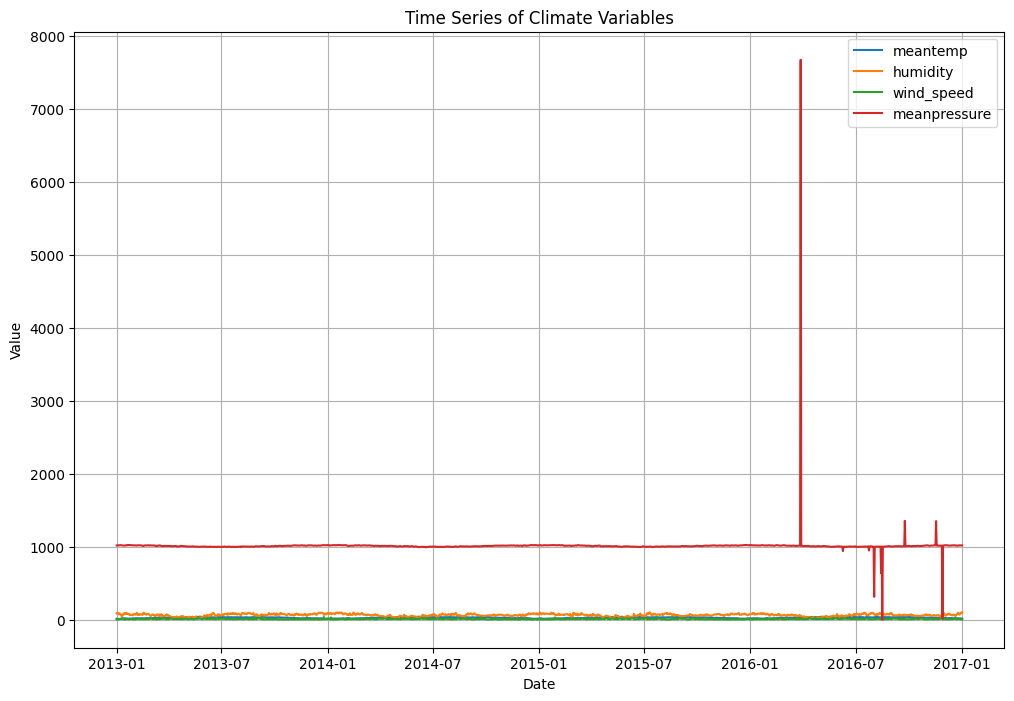

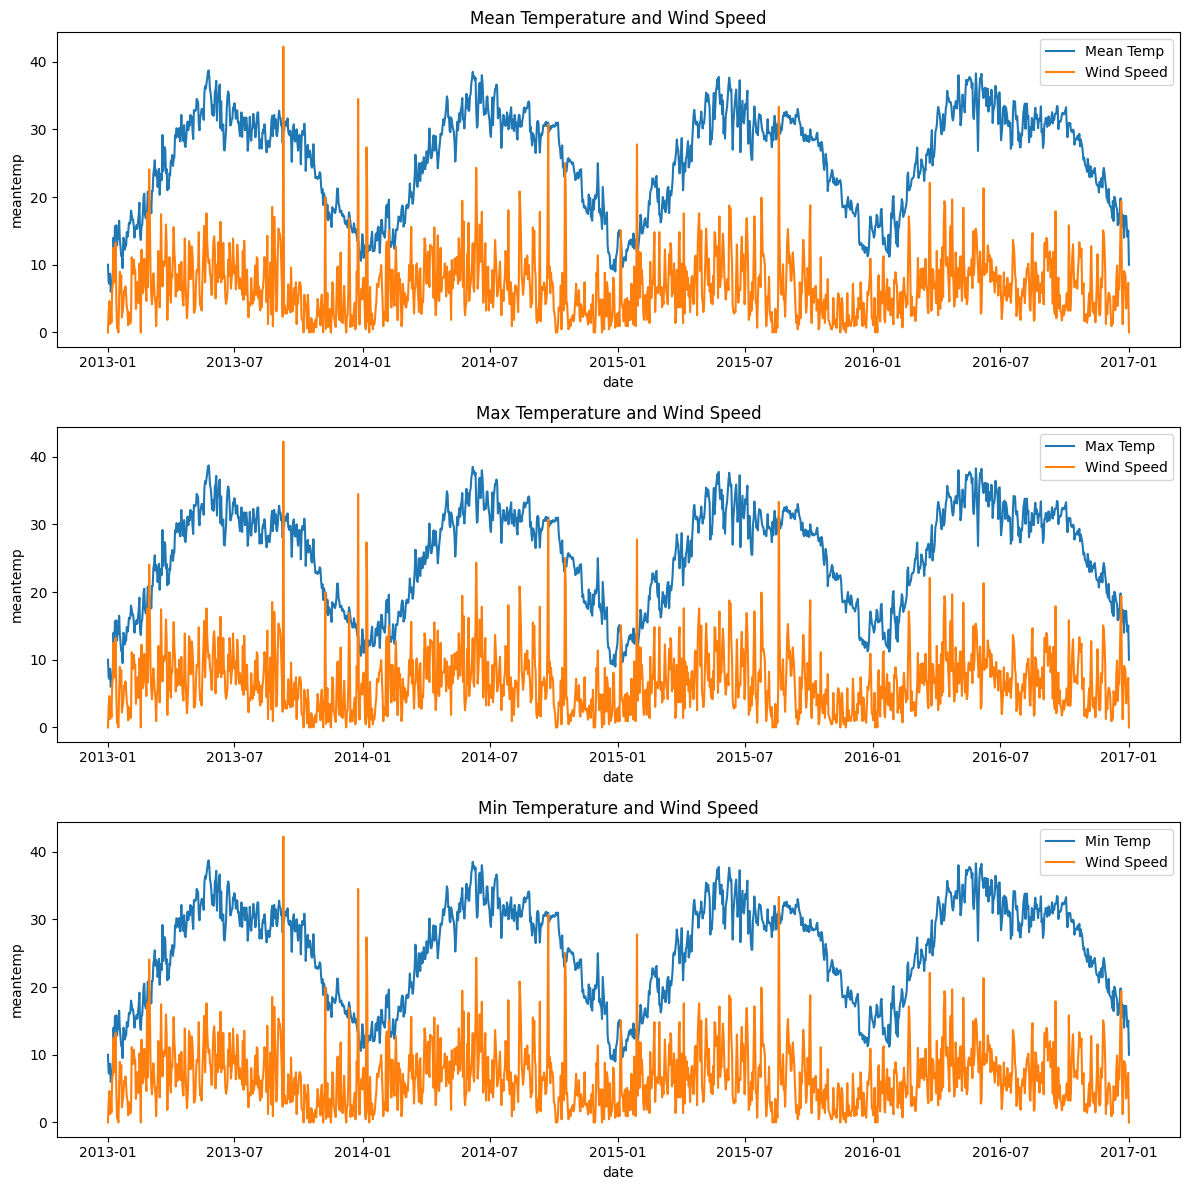

In [ ]:
# Q2: Time Series Visualization
# Plot the time series for all variables
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)

plt.figure(figsize=(12, 8))
for col in ['meantemp', 'humidity', 'wind_speed', 'meanpressure']:
    plt.plot(data[col], label=col)
plt.title("Time Series of Climate Variables")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()

# Subplots: Temperature (mean, max, min) vs Wind Speed
fig, ax = plt.subplots(3, 1, figsize=(12, 12))
sns.lineplot(x=data.index, y=data['meantemp'], ax=ax[0], label='Mean Temp')
sns.lineplot(x=data.index, y=data['wind_speed'], ax=ax[0], label='Wind Speed')
ax[0].set_title("Mean Temperature and Wind Speed")

sns.lineplot(x=data.index, y=data['meantemp'], ax=ax[1], label='Max Temp')
sns.lineplot(x=data.index, y=data['wind_speed'], ax=ax[1], label='Wind Speed')
ax[1].set_title("Max Temperature and Wind Speed")

sns.lineplot(x=data.index, y=data['meantemp'], ax=ax[2], label='Min Temp')
sns.lineplot(x=data.index, y=data['wind_speed'], ax=ax[2], label='Wind Speed')
ax[2].set_title("Min Temperature and Wind Speed")

plt.tight_layout()
plt.show()

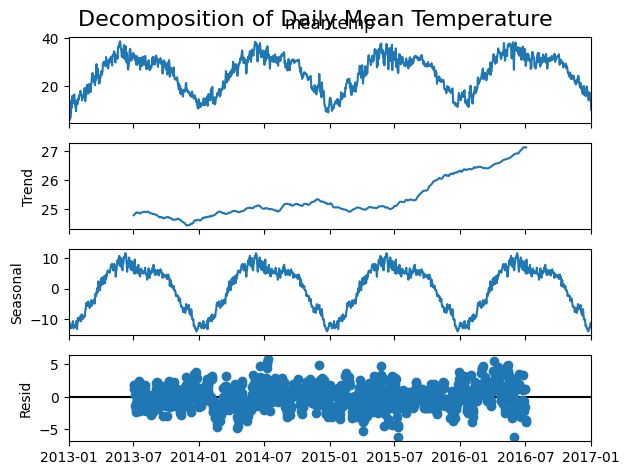


Seasonality:
 date
2013-01-01   -11.112191
2013-01-02   -12.097390
2013-01-03   -11.386488
2013-01-04   -11.134559
2013-01-05   -11.317170
Name: seasonal, dtype: float64


In [ ]:
# Q3: Seasonality and Trends
# Decompose daily mean temperature into components
decomposition = seasonal_decompose(data['meantemp'], model='additive', period=365)

# Plot the decomposition
decomposition.plot()
plt.suptitle("Decomposition of Daily Mean Temperature", fontsize=16)
plt.show()

# Discuss seasonality
seasonality = decomposition.seasonal
print("\nSeasonality:\n", seasonality.head())

Forecasting Performance:
Mean Absolute Error (MAE): 19.70
Root Mean Squared Error (RMSE): 22.36


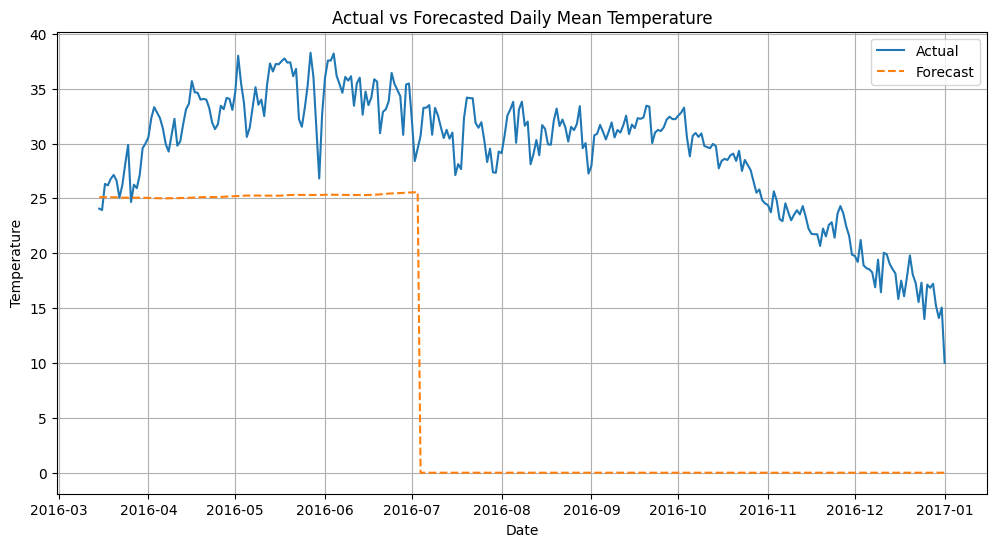

In [ ]:
# Q4: Forecasting
# Select daily mean temperature for forecasting
forecast_var = data['meantemp']

# Split into training and testing sets
train, test = train_test_split(forecast_var, test_size=0.2, shuffle=False)

# Seasonal Decomposition of Time Series (STL)
stl = seasonal_decompose(train, model='additive', period=365)

# Simple forecasting by extending the trend component
forecast = stl.trend[-len(test):]
forecast = forecast.fillna(0)

# Evaluate performance
mae = mean_absolute_error(test, forecast)
rmse = np.sqrt(mean_squared_error(test, forecast))

print(f"Forecasting Performance:\nMean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# Plot actual vs forecast
plt.figure(figsize=(12, 6))
plt.plot(test.index, test, label="Actual")
plt.plot(test.index, forecast, label="Forecast", linestyle='dashed')
plt.title("Actual vs Forecasted Daily Mean Temperature")
plt.xlabel("Date")
plt.ylabel("Temperature")
plt.legend()
plt.grid(True)
plt.show()